In [1]:
import scvi
ad = scvi.data.cortex(save_path="../../../data/")
# save object
ad.write("../../../data/cortex.h5ad")

/home/edo/micromamba/envs/env_scvi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO     File /mnt/SSD01/training/spatial_transcriptomic/test_OSTA/data/expression.bin already downloaded          
INFO     Loading Cortex data from /mnt/SSD01/training/spatial_transcriptomic/test_OSTA/data/expression.bin         


/home/edo/micromamba/envs/env_scvi/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/edo/micromamba/envs/env_scvi/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


INFO     Finished loading Cortex data                                                                              


/home/edo/micromamba/envs/env_scvi/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [2]:
ad.obs.cell_type

0            interneurons
1            interneurons
2            interneurons
3            interneurons
4            interneurons
              ...        
3000    endothelial-mural
3001    endothelial-mural
3002    endothelial-mural
3003    endothelial-mural
3004    endothelial-mural
Name: cell_type, Length: 3005, dtype: category
Categories (7, object): ['astrocytes_ependymal', 'endothelial-mural', 'interneurons', 'microglia', 'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS']

In [3]:
import scanpy as sc
test01 = sc.read_h5ad("../../../data/vis.heart.h5ad")


In [4]:
test01.raw.X[:5].toarray()

array([[0., 2., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 2., 0., 1.]], dtype=float32)

In [5]:
test01.X[:5].toarray()

array([[0.        , 0.86263424, 0.        , ..., 0.52158576, 0.        ,
        0.52158576],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6492354 , 0.6492354 , 0.        , ..., 0.6492354 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.0909383 , 0.        ,
        0.6873972 ]], dtype=float32)

In [6]:
import scanpy as sc
test = sc.read_h5ad("../../../data/stardist/Sample_HDP031_C1_expanded_nuclei.h5ad")

In [7]:
dir(test)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__annotations__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories'

In [ ]:
# it is missing the slot of data
test.raw.X[:5].toarray()

AttributeError: 'NoneType' object has no attribute 'X'

In [10]:
# see the content of the table of counts
test.X
test.X[:5].toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.67368   ,  2.2797075 ],
       [ 0.        ,  0.        ,  0.        , ...,  3.66304348,
         2.17118811,  6.79790495],
       [ 0.        ,  0.        ,  0.        , ...,  3.41891853,
         1.        ,  7.28941855],
       [ 0.        ,  0.        ,  0.        , ...,  1.05      ,
         0.        ,  2.79454545],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 12.37504711]])

/tmp/ipykernel_41504/840419623.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(test, color="total_counts")


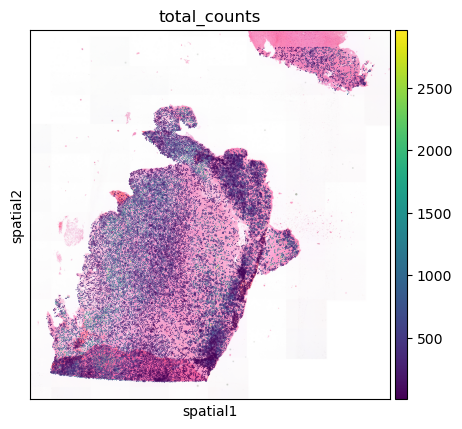

In [11]:
sc.pl.spatial(test, color="total_counts")

/tmp/ipykernel_41504/2161185088.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


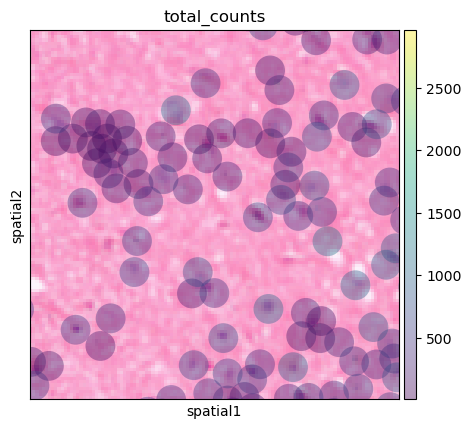

In [12]:
# Coordinates to use for cropping the image (left, right, top, bottom). These coordinates are expected to be in pixel space (same as basis) and will be transformed by scale_factor. If not provided, image is automatically cropped to bounds of basis, plus a border.
sc.pl.spatial(
    test,
    img_key="hires",
    color="total_counts",
    crop_coord=[19000,20000,40000,41000],
    alpha=0.4,
    size=1.2,
)

/tmp/ipykernel_41504/1428136499.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


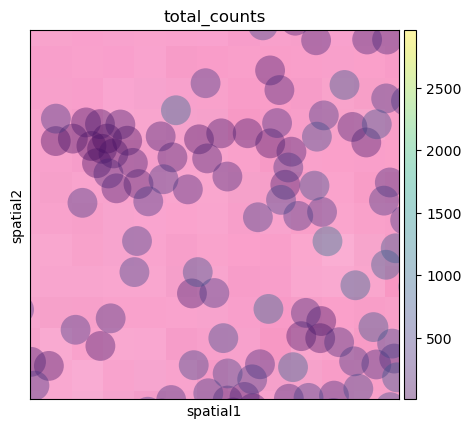

In [13]:
sc.pl.spatial(
    test,
    img_key="lowres",
    color="total_counts",
    crop_coord=[19000,20000,40000,41000],
    alpha=0.4,
    size=1.2,
)